# Environment Setup

# OCR - Optical Charater Recognition

OCR, or Optical Character Recognition, is a technology that is often employed in vehicle number plate detection systems. The primary goal of OCR in this context is to extract alphanumeric characters from images of vehicle license plates. Here's a brief overview of how OCR is typically used in vehicle number plate detection:

* Image Acquisition:

> The process starts with acquiring an image of a vehicle license plate. This image can be captured using cameras, CCTV systems, or other imaging devices.



* Preprocessing:

> Before applying OCR, it's common to preprocess the image to enhance its quality and make it more suitable for character recognition. Preprocessing may involve operations such as resizing, noise reduction, contrast adjustment, and image normalization.

* Localization of Number Plate:

> The license plate on a vehicle may not always be in a fixed position or have a consistent appearance. Therefore, it's necessary to locate the region of interest (ROI) containing the license plate in the image. This can be done using various image processing techniques like edge detection, contour analysis, or machine learning-based object detection methods.

* Character Segmentation:

> Once the license plate region is identified, the image is often segmented to isolate individual characters. Character segmentation is crucial for OCR accuracy, as it ensures that each character is processed independently.

* Character Recognition (OCR):

> The core OCR algorithm is applied to recognize and extract alphanumeric characters from the segmented regions. OCR technology can range from traditional techniques to deep learning-based models, depending on the complexity and variability of the license plate images.

* Post-processing:

> After OCR, post-processing steps may be applied to refine the results. This can include error correction, context analysis, and filtering out false positives.

* Output and Integration:

The final recognized text is then used as the output of the license plate recognition system. This information can be integrated into various applications, such as access control systems, toll collection systems, or law enforcement databases.
It's important to note that the effectiveness of OCR in vehicle number plate detection depends on the quality of the images, the variability in license plate designs, and the robustness of the OCR algorithm. Advanced techniques, including machine learning and deep learning, have significantly improved the accuracy of OCR systems in recent years.

# Tesseract Library

 Tesseract is an open-source Optical Character Recognition (OCR) engine developed by Google. It is designed to recognize text in images and convert it into machine-readable text. Tesseract supports various languages and can be used for a wide range of applications, including document analysis, text extraction, and, relevant to our previous discussion, license plate recognition.

Key features of Tesseract OCR include:

1. Open Source: Tesseract is freely available under the Apache License 2.0. This makes it accessible for developers and researchers to use, modify, and distribute.

2. Language Support: Tesseract supports multiple languages, and users can train the engine for specific languages if needed.

3. Accuracy: Tesseract has undergone significant improvements in terms of accuracy over the years, especially with the introduction of deep learning-based models.

4. Adaptability: Tesseract can be used with various programming languages, making it versatile and easy to integrate into different applications.

5. Community Support: Being an open-source project, Tesseract has a large and active community of developers and contributors, which means ongoing support and updates.

For OCR tasks, including license plate recognition, developers often use Tesseract in combination with other image processing and computer vision techniques to achieve optimal results. It's important to note that while Tesseract is a powerful tool, the effectiveness of OCR also depends on the specific requirements and characteristics of the images being processed.



In [11]:
import cv2
import easyocr
from matplotlib import pyplot as plt

In [21]:
def preprocess_image(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise and improve OCR accuracy
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    return blurred


In [14]:
def perform_ocr(image,reader):

  # Perform OCR on the preprocessed image
  result = reader.readtext(image)

  #Extract and return the recognized text
  recognized_text = ' '.join([entry[1] for entry in result])
  return recognized_text

* recognized_text = ' '.join([entry[1] for entry in result]) extracts the recognized text from the OCR result. The result variable is assumed to be a list of tuples, where each tuple contains information about a recognized element in the image. The recognized text is extracted from the second element (index 1) of each tuple. The extracted text elements are then joined into a single string using a space as a separator.

* return recognized_text returns the final recognized text as a string.

In [18]:
def display_image_with_results(image, recognized_text):
    # Display the image with recognized text
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Recognized Text: {recognized_text}")
    plt.axis('off')
    plt.show()

In [22]:
def number_plate_recognition(image_path):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)

    # Create an OCR reader using the 'en' language for English text
    reader = easyocr.Reader(['en'])

    # Perform OCR on the preprocessed image
    recognized_text = perform_ocr(preprocessed_image, reader)

    # Display the results
    display_image_with_results(cv2.imread(image_path), recognized_text)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

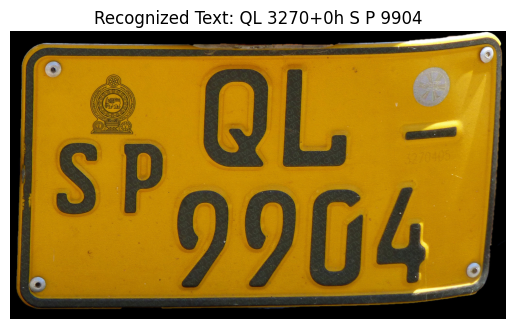

In [23]:
# Example Usage

image_path = 'NumPlate.jpg'
number_plate_recognition(image_path)

# Region of Interest

Coupling OCR (Optical Character Recognition) with ROI (Region of Interest) is important for several reasons in the context of tasks like document analysis, text extraction, and especially for applications like license plate recognition. Here are some reasons why OCR is often coupled with ROI:

* Efficiency:

> Focusing OCR on a specific Region of Interest rather than the entire image can significantly improve processing speed and efficiency. By narrowing down the area for character recognition, the OCR algorithm can operate more quickly.

* Reduced Computational Load:

> OCR algorithms can be computationally intensive. By restricting OCR to a smaller region where text is expected, unnecessary computations on non-text regions are avoided, leading to a reduction in overall computational load.

* Improved Accuracy:

> Limiting OCR to a specific Region of Interest can enhance accuracy. OCR algorithms may face challenges in scenarios where there are non-text elements in the image that could be mistakenly recognized as characters. Focusing on a designated ROI helps mitigate such issues.

* Handling Variability:

> In applications like license plate recognition, the position and appearance of the license plate on a vehicle may vary. Defining a Region of Interest allows the system to adapt to this variability and locate the license plate before initiating OCR.

* Noise Reduction:

> By extracting a specific region containing the text of interest, irrelevant information and background noise are minimized. This contributes to better signal-to-noise ratio, improving OCR accuracy.

* Resource Optimization:

> In resource-constrained environments, such as embedded systems or edge devices, processing the entire image for OCR may be impractical. Defining a Region of Interest allows for resource optimization by focusing OCR on specific areas of importance.

* Real-time Applications:

> For real-time applications like license plate recognition in surveillance systems, coupling OCR with ROI is crucial for meeting stringent time constraints. The faster processing of a defined region enables quick responses in real-time scenarios.

* Customization for Specific Tasks:

> Different tasks within an application may require OCR on different regions. By coupling OCR with ROI, you can customize the OCR process for specific tasks and improve overall system performance.


In summary, coupling OCR with ROI is a strategic approach to optimize processing efficiency, enhance accuracy, and address challenges associated with variations in image content. It allows OCR systems to be more targeted, adaptable, and effective in extracting text from images or documents.